In [380]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import unique
import scipy as sp
import seaborn as sns
import re, math

In [524]:
df = pd.read_csv('train.csv')
df['cabinlet']=None
df['cabinnum']=None
df['prefix']=None
df['ticky']=None
for a in np.arange(0,891):
    if isinstance(df['Cabin'][a],str):
        m= re.search('[A-Z]',df['Cabin'][a])
        if m:
            cabinletter = m.group(0)
        df.loc[a,'cabinlet']= cabinletter
        
        if re.search('\d\d\d',df['Cabin'][a])!=None:
            g= re.search('\d\d\d',df['Cabin'][a]).group(0)
        elif re.search('\d\d',df['Cabin'][a])!=None:
            g= re.search('\d\d',df['Cabin'][a]).group(0)
        elif re.search('\d',df['Cabin'][a])!=None:
            g= re.search('\d',df['Cabin'][a]).group(0)

        df.loc[a,'cabinnum']= int(g)
        
    if re.search('[A-Z]\S\.',df['Name'][a])!=None:
        h = re.search('[A-Z]\S\.',df['Name'][a]).group(0)
    elif re.search('[A-Z]\S\S\.',df['Name'][a])!=None:
        h = re.search('[A-Z]\S\S\.',df['Name'][a]).group(0)
    elif re.search('[A-Z]\S\S\S\.',df['Name'][a])!=None:
        h = re.search('[A-Z]\S\S\S\.',df['Name'][a]).group(0)
    elif re.search('[A-Z]\S\S\S\S\.',df['Name'][a])!=None:
        h = re.search('[A-Z]\S\S\S\S\.',df['Name'][a]).group(0)
    elif re.search('[A-Z]\S\S\S\S\S\.',df['Name'][a])!=None:
        h = re.search('[A-Z]\S\S\S\S\S\.',df['Name'][a]).group(0)
    elif re.search('[A-Z]\S\S\S\S\S\S\.',df['Name'][a])!=None:
        h = re.search('[A-Z]\S\S\S\S\S\S\.',df['Name'][a]).group(0)
    elif re.search('[A-Z]\S\S\S\S\S\S\S\.',df['Name'][a])!=None:
        h = re.search('[A-Z]\S\S\S\S\S\S\S\.',df['Name'][a]).group(0)
    else:
        h=None
    df.loc[a,'prefix']= h
    
    if re.search('....',df['Ticket'][a])!=None:
        t = re.search('....',df['Ticket'][a]).group(0)
    df.loc[a,'ticky']= t
for a in np.arange(0,891):    
    if re.search('\d\d\d\d',df['ticky'][a])!=None:
        df.loc[a,'ticky']= 1100

In [455]:
agebins = [0,8,18,23,30,40,60,100]
df['age_group'] = pd.cut(df['Age'], agebins)
df['age_group'] = df['age_group'].astype('category').cat.codes

df.groupby(['age_group','Sex']).mean()
df['baby']= 0
df.loc[df['Age']<7,'baby']=1

df['cabin_bins']= None
cabinbins = [0,10,30,50,75,100,150]
df.loc[df['cabinnum'].isnull()==False,'cabin_bins'] = pd.cut(df.loc[df['cabinnum'].isnull()==False,'cabinnum'], cabinbins)
df['cabin_bins'] = df['cabin_bins'].astype('category').cat.codes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabinlet,cabinnum,prefix,age_group,baby,cabin_bins,family,genderclass
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,None,None,12,2,0,-1,1,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,85,13,4,0,4,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None,None,9,3,0,-1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,123,13,4,0,5,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,None,None,12,4,0,-1,0,5


True

In [527]:
df['Sex'][df['ticky']==1100].value_counts()

male      421
female    239
Name: Sex, dtype: int64

In [451]:
df['family']=df['SibSp']+df['Parch']
df['genderclass']= df['Sex'].astype(str)+df['Pclass'].astype(str) 
df.groupby(['Sex','Pclass']).mean()
df['genderclass'] = df['genderclass'].astype('category').cat.codes

In [476]:
df['Sex']= df['Sex'].astype('category').cat.codes
df['prefix']= df['prefix'].astype('category').cat.codes
df['cabinlet']= df['cabinlet'].astype('category').cat.codes

In [395]:
df_orig = pd.read_csv('train.csv')

[['Sex','family','baby','age_group','Fare','genderclass']]

In [507]:
from sklearn.model_selection import train_test_split
#split data into train, test.
X= df[['genderclass','cabinlet','SibSp','Fare']]
y= df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape


(668, 4)

,Model,Train Acc,Test Acc,Precision,Recall,ROC AUC,PR AUC
0,Random Forest,91.47%,83.41%,76.62%,75.64%,85.06%,79.60%
1,Logistic Regression,78.74%,80.72%,70.59%,76.92%,86.73%,85.02%
2,SVC,87.13%,78.48%,69.23%,69.23%,81.59%,64.41%
3,Gradient Boosting,86.68%,82.51%,77.46%,70.51%,88.55%,85.65%


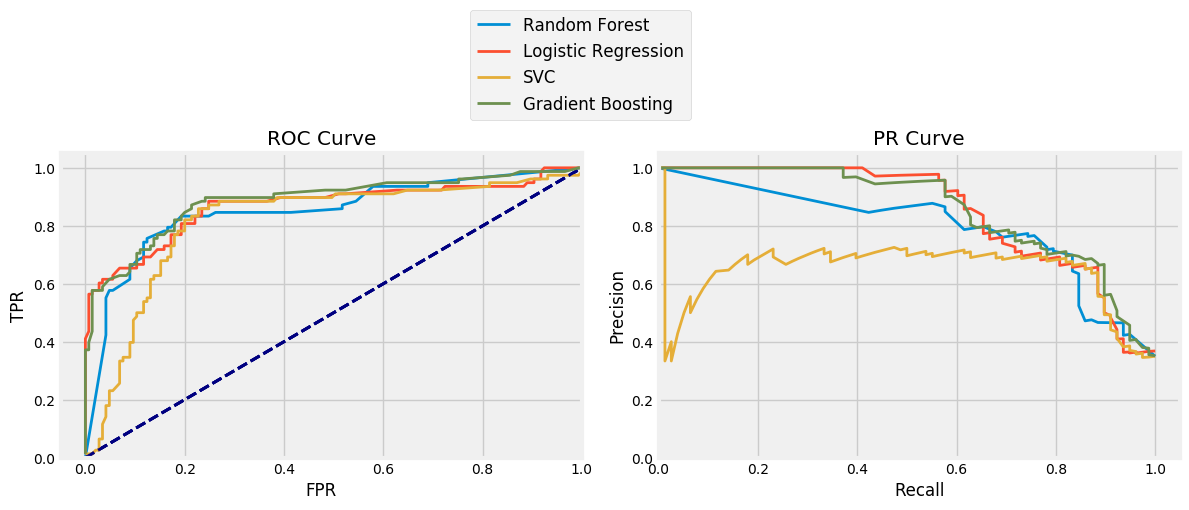

In [508]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc



classifiers = [RandomForestClassifier(),LogisticRegression(),SVC(), GradientBoostingClassifier()]
class_text = ['Random Forest','Logistic Regression','SVC','Gradient Boosting']
columns = ['Model','Train Acc','Test Acc','Precision','Recall','ROC AUC','PR AUC']
the_df = pd.DataFrame(index=[0],columns=columns)
fig = plt.figure(figsize=(12,4),dpi=100)

for c in classifiers:
    
    #Fit Random Forest
    clf = c
    clf.fit(X_train,y_train)
    # test on the training and test set
    training = clf.score(X_train,y_train)
    test = clf.score(X_test,y_test)
    
    #probabilities
    if clf==classifiers[2]:
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)[:,1]
    
    #ROC Numbers
    fpr, tpr, _ = roc_curve(y_test,y_score)
    roc_auc = roc_auc_score(y_test,y_score)

    
    #ROC Curve
    ax1= plt.subplot(121)
    lw = 2
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.plot(fpr, tpr,lw=lw, label= class_text[classifiers.index(c)])
    plt.xlim([-.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')


    #PR Numbers
    prec, recall, _ = precision_recall_curve(y_test,y_score)
    pr_auc = auc(recall,prec)
    prscore= precision_score(y_test,clf.predict(X_test))
    recscore= recall_score(y_test,clf.predict(X_test))
    
    #PR Curve
    ax2= plt.subplot(122)
    plt.plot(recall, prec, lw=lw, label= class_text[classifiers.index(c)])
    plt.xlim([0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curve')
    plt.legend(loc='upper center',bbox_to_anchor=(-.15,1.5,0,0),fontsize=12)
    
    #add to df
    the_df.loc[classifiers.index(c)] = [class_text[classifiers.index(c)],'{:.2%}'.format(training),
    '{:.2%}'.format(test),'{:.2%}'.format(prscore),'{:.2%}'.format(recscore),'{:.2%}'.format(roc_auc),'{:.2%}'.format(pr_auc)]

plt.tight_layout()
the_df

In [509]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
features = pd.DataFrame({'columns': X.columns,
             'importance': clf.feature_importances_})
features.sort_values('importance',ascending=False)

,columns,importance
3,Fare,0.461347
0,genderclass,0.379573
1,cabinlet,0.105450
2,SibSp,0.053629
